<a href="https://colab.research.google.com/github/zubairaladzhari/GoogleCoolabOK/blob/main/KLASIFIKASI_OBESITAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KLASIFIKASI OBESITAS MENGGUNAKAN KNN

Di buat oleh : Andre Mahadi

## Import data dan load dataset

In [141]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

#load dataset
data = pd.read_csv('Kaggle/Obesity_Classification.csv')

data.head(10)

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese
5,6,50,Female,140,40,16.7,Underweight
6,7,55,Male,200,110,34.2,Obese
7,8,60,Female,130,30,13.3,Underweight
8,9,65,Male,210,120,37.2,Obese
9,10,70,Female,120,20,10.0,Underweight


## Read and Explore Dataset

In [142]:
# 2. mengelola Dataset Awal


print("Info Dataset:")
print(data.info())
print("\nStatistik Deskriptif:")
print(data.describe(include='all'))
print("\nJumlah Data Awal:", data.shape[0])

Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      108 non-null    int64  
 1   Age     108 non-null    int64  
 2   Gender  108 non-null    object 
 3   Height  108 non-null    int64  
 4   Weight  108 non-null    int64  
 5   BMI     108 non-null    float64
 6   Label   108 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 6.0+ KB
None

Statistik Deskriptif:
                ID         Age Gender      Height      Weight         BMI        Label
count   108.000000  108.000000    108  108.000000  108.000000  108.000000          108
unique         NaN         NaN      2         NaN         NaN         NaN            4
top            NaN         NaN   Male         NaN         NaN         NaN  Underweight
freq           NaN         NaN     56         NaN         NaN         NaN           47
mean     56.046296   46.

In [143]:
# 3. Menghapus Data Duplikat
data = data.drop_duplicates()
print("\nJumlah Data Setelah Menghapus Duplikat:", data.shape[0])


Jumlah Data Setelah Menghapus Duplikat: 108


In [144]:
# 4. Menangani Data Kosong (Null)
print("\nJumlah Data Kosong per Kolom:")
print(data.isnull().sum())



Jumlah Data Kosong per Kolom:
ID        0
Age       0
Gender    0
Height    0
Weight    0
BMI       0
Label     0
dtype: int64


In [145]:
# Imputasi Data Kosong (Contoh: Mean untuk numerik, Modus untuk kategorikal)
for col in data.columns:
    if data[col].isnull().sum() > 0:
        if data[col].dtype == 'object':  # Jika kolom kategorikal
            data[col].fillna(data[col].mode()[0], inplace=True)
        else:  # Jika kolom numerik
            data[col].fillna(data[col].mean(), inplace=True)

print("\nJumlah Data Kosong Setelah Imputasi:")
print(data.isnull().sum())


Jumlah Data Kosong Setelah Imputasi:
ID        0
Age       0
Gender    0
Height    0
Weight    0
BMI       0
Label     0
dtype: int64


In [146]:
# Menghapus tabel yang tidak di gunakan "id"
if 'ID' in data.columns:
    data = data.drop(columns=['ID'])

## Visualisasi Distribusi Data (EDA)

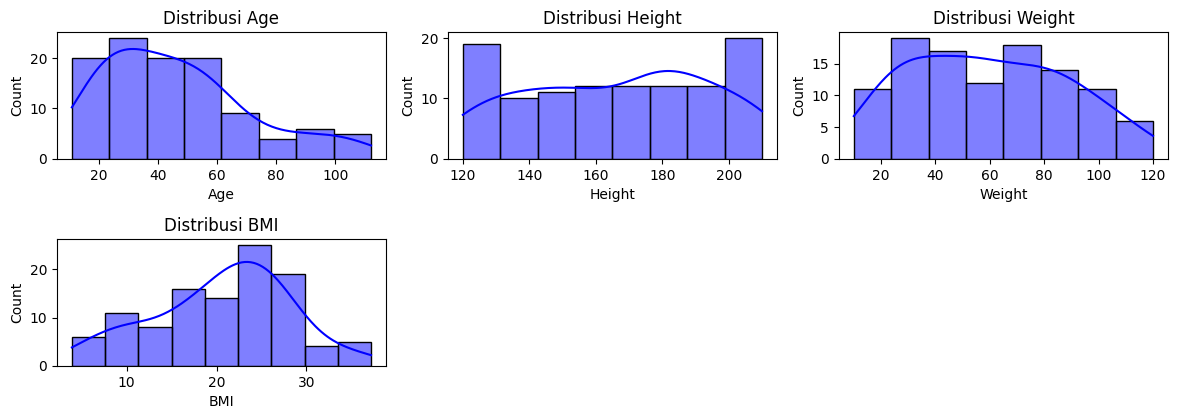

In [147]:
# a. Fitur Numerik
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_features):
    plt.subplot(4, 3, i + 1)
    sns.histplot(data[col], kde=True, color='blue')
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

<ipython-input-148-ba4e89831b18>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data[col], palette='viridis')
<ipython-input-148-ba4e89831b18>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data[col], palette='viridis')


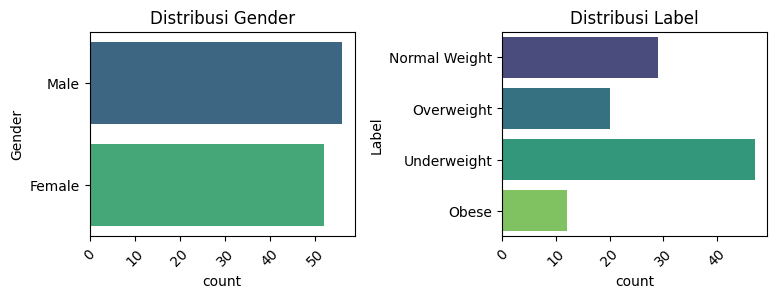

In [148]:
# b. Fitur Kategorikal
categorical_features = data.select_dtypes(include=['object']).columns
plt.figure(figsize=(12, 8))
for i, col in enumerate(categorical_features):
    plt.subplot(3, 3, i + 1)
    sns.countplot(data[col], palette='viridis')
    plt.title(f'Distribusi {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [149]:
#mengubah tipe data kategorikal ke numeric

label_encoder=LabelEncoder()
data['target']=label_encoder.fit_transform(data['Label'])
data['gender']=label_encoder.fit_transform(data['Gender'])
data.head()

,Age,Gender,Height,Weight,BMI,Label,target,gender
0,25,Male,175,80,25.3,Normal Weight,0,1
1,30,Female,160,60,22.5,Normal Weight,0,0
2,35,Male,180,90,27.3,Overweight,2,1
3,40,Female,150,50,20.0,Underweight,3,0
4,45,Male,190,100,31.2,Obese,1,1


In [150]:
#mengambil hanya data numeric saja

numerical_data = data.select_dtypes(include=['float64', 'int64'])
numerical_data

,Age,Height,Weight,BMI,target,gender
0,25,175,80,25.3,0,1
1,30,160,60,22.5,0,0
2,35,180,90,27.3,2,1
3,40,150,50,20.0,3,0
4,45,190,100,31.2,1,1
...,...,...,...,...,...,...
103,11,175,10,3.9,3,1
104,16,160,10,3.9,3,0
105,21,180,15,5.6,3,1
106,26,150,15,5.6,3,0


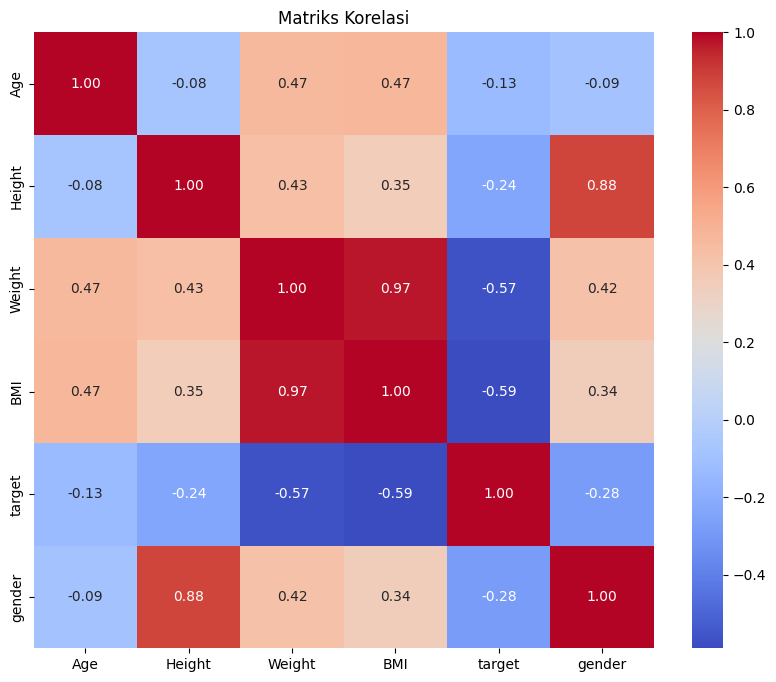

In [151]:
# Menghitung matriks korelasi
correlation_matrix = numerical_data.corr()

# Visualisasi matriks korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriks Korelasi")
plt.show()

In [152]:
# 6. Menyimpan Dataset Bersih
data.to_csv('Kaggle/Cleaned_ObesityDataSet.csv', index=False)
print("\nDataset bersih berhasil disimpan sebagai 'Cleaned_ObesityDataSet.csv'")



Dataset bersih berhasil disimpan sebagai 'Cleaned_ObesityDataSet.csv'
